In [1]:
import numpy as np
import pandas as pd
from medpy.io import load
import os
import cv2
from sklearn.model_selection import train_test_split

# Import data

In [2]:
path="./NN/waa"
carpet="Ultrasound_minFrame"
AM_FM_images={}
for _,i,_ in os.walk(path):
    if len(i)==100:
        subjects=i

perc_train=0.75
names_train,names_test=train_test_split(subjects, train_size=perc_train, 
                                        test_size=1-perc_train, random_state=3)
names_val,names_test=train_test_split(names_test, train_size=15/25, 
                                        test_size=10/25, random_state=3)

print(len(names_train))
print(len(names_val))
print(len(names_test))

75
15
10


In [3]:
def import_data(path, subjects, reshape):
    # This function loads the csv files and images. Moreover, it removes data that do not have a value for muscles.
    
    x_img = [] #Original image
    x_ctg = pd.DataFrame() #Categorical data
    y = pd.DataFrame() #csv files
    
    i = 1
    for subject in subjects:
        print(subject,'number',i)
        carpet="Ultrasound_minFrame"
        
        # Load csv files
        values = pd.read_csv(os.path.join(path, subject, 'thickness.csv')) # Thickness
        ctg_data = pd.read_csv(os.path.join(path, subject, 'categorical_values.csv')) # Categorical data (extremity and position)
        
        # Remove NAN data
        index = values['Muscle'].index[values['Muscle'].apply(np.isnan)] # Index where there is no value for muscle
        values.dropna(subset = ["Muscle"], inplace=True)
        x_ctg = x_ctg.append(ctg_data.drop(index=index), ignore_index=True)
        y = y.append(values, ignore_index=True)
        
        # Load images
        directory = os.path.join(path, subject, carpet)
        for _,_,images_name in os.walk(directory):
            j=0
            total=0
            for image_name in images_name:
                if j not in index: 
                    total += 1
                    image, _ = load(os.path.join(directory, image_name))
                    image = image[201:801, 31:745, 0, 0].T/255
                    if reshape:
                        image = cv2.resize(image, (256, 304))
                    x_img.append(image)
                j+=1
        print('# images used: %i' %total)
        print(list(index))
        print('-'*40)
        i+=1
        
    x_img = np.array(x_img, dtype=np.float32)
    dim = x_img.shape
    dim = np.append(dim, 1) # We add a fourth dimension which represents the number of channels
    
    # Converting categorical data to numerical data
    cleanup = {
        'Extremity': {'LL': 1, 'UL': 2, 'LA': 3, 'UA': 4},
        'Position': {'AD': 1, 'AC': 2, 'AP': 3, 'LD': 4, 'LP': 5, 'LC': 6, 'MC': 7, 'MD': 8, 'MP': 9, 'PC': 10, 'PD': 11, 'PP': 12}
    }
    x_ctg.replace(cleanup, inplace=True)
    
    return x_img.reshape(dim), x_ctg.drop(columns=['Name']), y.drop(columns=['Name'])

In [4]:
x_img_train, x_ctg_train, y_train=import_data(path, names_train[:75], reshape=True)
print('shape x_img_train', x_img_train.shape)
print('shape x_ctg_train', x_ctg_train.shape)
print('shape y_train', y_train.shape)

MULTIS088-1 number 1
# images used: 45
[18, 23, 24]
----------------------------------------
MULTIS019-1 number 2
# images used: 48
[]
----------------------------------------
MULTIS067-1 number 3
# images used: 45
[21, 46, 47]
----------------------------------------
MULTIS049-1 number 4
# images used: 48
[]
----------------------------------------
MULTIS052-1 number 5
# images used: 46
[46, 47]
----------------------------------------
MULTIS032-1 number 6
# images used: 47
[46]
----------------------------------------
MULTIS007-1 number 7
# images used: 48
[]
----------------------------------------
MULTIS015-1 number 8
# images used: 44
[9, 30, 40, 45]
----------------------------------------
MULTIS033-1 number 9
# images used: 47
[46]
----------------------------------------
MULTIS090-1 number 10
# images used: 46
[46, 47]
----------------------------------------
MULTIS013-1 number 11
# images used: 46
[46, 47]
----------------------------------------
MULTIS060-1 number 12
# images

In [5]:
x_img_val, x_ctg_val, y_val = import_data(path, names_val, reshape=True)
print('shape x_img_val', x_img_val.shape)
print('shape x_ctg_val', x_ctg_val.shape)
print('shape y', y_val.shape)

MULTIS036-1 number 1
# images used: 48
[]
----------------------------------------
MULTIS098-1 number 2
# images used: 45
[25, 46, 47]
----------------------------------------
MULTIS014-1 number 3
# images used: 48
[]
----------------------------------------
MULTIS100-1 number 4
# images used: 45
[27, 46, 47]
----------------------------------------
MULTIS044-1 number 5
# images used: 46
[46, 47]
----------------------------------------
MULTIS085-1 number 6
# images used: 44
[24, 25, 46, 47]
----------------------------------------
MULTIS075-1 number 7
# images used: 47
[46]
----------------------------------------
MULTIS017-1 number 8
# images used: 47
[26]
----------------------------------------
MULTIS011-1 number 9
# images used: 48
[]
----------------------------------------
MULTIS081-1 number 10
# images used: 47
[47]
----------------------------------------
MULTIS047-1 number 11
# images used: 46
[46, 47]
----------------------------------------
MULTIS095-1 number 12
# images us

In [6]:
x_img_test, x_ctg_test, y_test = import_data(path, names_test, reshape=True)
print('shape x_test1', x_img_test.shape)
print('shape x_test1', x_ctg_test.shape)
print('shape y', y_test.shape)

MULTIS061-1 number 1
# images used: 48
[]
----------------------------------------
MULTIS025-1 number 2
# images used: 48
[]
----------------------------------------
MULTIS073-1 number 3
# images used: 48
[]
----------------------------------------
MULTIS006-1 number 4
# images used: 47
[26]
----------------------------------------
MULTIS077-1 number 5
# images used: 45
[25, 46, 47]
----------------------------------------
MULTIS084-1 number 6
# images used: 47
[46]
----------------------------------------
MULTIS099-1 number 7
# images used: 46
[46, 47]
----------------------------------------
MULTIS008-1 number 8
# images used: 48
[]
----------------------------------------
MULTIS069-1 number 9
# images used: 48
[]
----------------------------------------
MULTIS010-1 number 10
# images used: 46
[41, 42]
----------------------------------------
shape x_test1 (471, 304, 256, 1)
shape x_test1 (471, 2)
shape y (471, 3)


# Pre-process

In [7]:
# Normalize the data: 

y_info = y_train.copy()

# Z-score normalization
y1_train = (y_train - y_train.mean())/y_train.std()
y1_val = (y_val - y_train.mean())/y_train.std()
y1_test = (y_test - y_train.mean())/y_train.std()


# Min-max normalization
y2_train = (y_train - y_train.min())/(y_train.max() - y_train.min())
y2_val = (y_val - y_train.min())/(y_train.max() - y_train.min())
y2_test = (y_test - y_train.min())/(y_train.max() - y_train.min())

# Decimal scaling normalization
y3_train = y_train/np.array([10,100,100])
y3_val = y_val/np.array([10,100,100])
y3_test = y_test/np.array([10,100,100])

In [8]:
def remove_outliers(x_img, x_ctg, y, y1, y2, y3):

    z_score = y1
    
    index = z_score.index[((abs(z_score)<3).apply(np.sum,axis=1))==3].tolist()
    index_images = np.sum(abs(np.array(y1))<3, axis=1)==3
    
    x_ctg, y, y1, y2, y3 = x_ctg.loc[index], y.loc[index], y1.loc[index], y2.loc[index], y3.loc[index]
    x_img_new = x_img[index_images]
    
    return x_img_new, np.array(x_ctg), np.array(y), np.array(y1), np.array(y2), np.array(y3)

In [9]:
from sklearn.utils import shuffle

print('BEFORE')
print('x_img_train', x_img_train.shape)
print('x_ctg_train', x_ctg_train.shape)
print('y_train: ', y_train.shape)
print('x_img_val', x_img_val.shape)
print('x_ctg_val', x_ctg_val.shape)
print('y_val: ', y_val.shape)
print('x_test', x_img_test.shape)
print('x_test', x_ctg_test.shape)
print('y_test: ', y_test.shape)
print('-'*50)

# Remove outliers
x_img_train, x_ctg_train, y_train , y1_train, y2_train, y3_train = remove_outliers(x_img_train, x_ctg_train, 
                                                                                   y_train, y1_train, y2_train, y3_train)

x_img_val, x_ctg_val, y_val, y1_val, y2_val, y3_val = remove_outliers(x_img_val, x_ctg_val, 
                                                               y_val, y1_val, y2_val, y3_val)

x_img_test, x_ctg_test, y_test, y1_test, y2_test, y3_test = remove_outliers(x_img_test ,x_ctg_test, 
                                                                            y_test, y1_test, y2_test, y3_test)

# Shuffle training data
x_img_train, x_ctg_train, y_train, y1_train, y2_train, y3_train = shuffle(x_img_train, x_ctg_train, 
                                                             y_train, y1_train, y2_train, y3_train, random_state=0)

print('AFTER')
print('x_img_train', x_img_train.shape)
print('x_ctg_train', x_ctg_train.shape)
print('y_train: ', y_train.shape)
print('x_img_val', x_img_val.shape)
print('x_ctg_val', x_ctg_val.shape)
print('y_val: ', y_val.shape)
print('x_test', x_img_test.shape)
print('x_test', x_ctg_test.shape)
print('y_test: ', y_test.shape)

BEFORE
x_img_train (3477, 304, 256, 1)
x_ctg_train (3477, 2)
y_train:  (3477, 3)
x_img_val (698, 304, 256, 1)
x_ctg_val (698, 2)
y_val:  (698, 3)
x_test (471, 304, 256, 1)
x_test (471, 2)
y_test:  (471, 3)
--------------------------------------------------
AFTER
x_img_train (3370, 304, 256, 1)
x_ctg_train (3370, 2)
y_train:  (3370, 3)
x_img_val (671, 304, 256, 1)
x_ctg_val (671, 2)
y_val:  (671, 3)
x_test (463, 304, 256, 1)
x_test (463, 2)
y_test:  (463, 3)


# Deep Learning

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, activations, regularizers, Input
import models_and_functions_phase1 as cc

In [11]:
# Here you have two options
# You can use the function called'network' if you want to build a model that does not include the categorical. 
# Or you can use the function called 'network_categorical'

snn_model1 = cc.network(input_shape = x_img_train.shape[-3:]) # Z-score

snn_model2 = cc.network(input_shape = x_img_train.shape[-3:]) # Z-score

snn_model3 = cc.network(input_shape = x_img_train.shape[-3:]) # min-max

snn_model4 = cc.network(input_shape = x_img_train.shape[-3:]) # decimal scaling

In [12]:
from tensorflow.keras.optimizers import Adam

epoch=180

batch_size=64

lr=0.0001

### Change here ###
costum_metric = False
# if you want ot use a tu use the costum loss function, type True
# else, False
### end

if costum_metric:
    weights = [1.474027/3,  8.394525/3, 28.019913/3]
else:
    weights = [1/3,1/3,1/3]

## MODELS

# Simple Neural Network
snn_model1.compile(optimizer = Adam(lr = lr),
                   loss = 'mse',
                   metrics = 'mae', 
                   loss_weights=weights)

snn_model2.compile(optimizer = Adam(lr = lr),
                   loss = 'mse',
                   metrics = 'mae', 
                   loss_weights=weights)

snn_model3.compile(optimizer = Adam(lr = lr),
                   loss = 'mse',
                   metrics = 'mae', 
                   loss_weights=weights)

snn_model4.compile(optimizer = Adam(lr = lr),
                   loss = 'mse',
                   metrics = 'mae', 
                   loss_weights=weights)

In [13]:
history_snn_model1, snn_model1= cc.fit_network(model=snn_model1, batchsize=batch_size, epoch=epoch, 
                                               callback_properties=[False, False, 'no_norm.h5'],
                                               x_img_train=x_img_train, x_ctg_train=x_ctg_train, y_train=y_train,
                                               x_img_val=x_img_val, x_ctg_val=x_ctg_val, y_val=y_val)

Epoch 1/180
52/52 - 16s - loss: 325.8586 - Skin_loss: 3.8083 - Fat_loss: 91.9135 - Muscle_loss: 881.8540 - Skin_mae: 1.6420 - Fat_mae: 7.9128 - Muscle_mae: 27.1238 - val_loss: 398.7526 - val_Skin_loss: 2.9889 - val_Fat_loss: 80.7753 - val_Muscle_loss: 1112.4935 - val_Skin_mae: 1.6607 - val_Fat_mae: 7.4167 - val_Muscle_mae: 30.6290
Epoch 2/180
52/52 - 6s - loss: 296.5555 - Skin_loss: 3.3279 - Fat_loss: 86.1289 - Muscle_loss: 800.2098 - Skin_mae: 1.5512 - Fat_mae: 7.9062 - Muscle_mae: 27.0107 - val_loss: 325.1845 - val_Skin_loss: 2.6746 - val_Fat_loss: 71.1448 - val_Muscle_loss: 901.7343 - val_Skin_mae: 1.5592 - val_Fat_mae: 6.8330 - val_Muscle_mae: 27.7912
Epoch 3/180
52/52 - 6s - loss: 284.3741 - Skin_loss: 3.1238 - Fat_loss: 83.2317 - Muscle_loss: 766.7669 - Skin_mae: 1.5184 - Fat_mae: 7.8846 - Muscle_mae: 26.8865 - val_loss: 319.7346 - val_Skin_loss: 2.9349 - val_Fat_loss: 67.8080 - val_Muscle_loss: 888.4607 - val_Skin_mae: 1.6595 - val_Fat_mae: 6.6932 - val_Muscle_mae: 28.1465
Epoch

Epoch 26/180
52/52 - 6s - loss: 129.1723 - Skin_loss: 0.4430 - Fat_loss: 21.0011 - Muscle_loss: 366.0726 - Skin_mae: 0.5275 - Fat_mae: 3.9645 - Muscle_mae: 18.7891 - val_loss: 118.4225 - val_Skin_loss: 0.2799 - val_Fat_loss: 19.7685 - val_Muscle_loss: 335.2191 - val_Skin_mae: 0.4277 - val_Fat_mae: 3.7441 - val_Muscle_mae: 17.9279
Epoch 27/180
52/52 - 6s - loss: 120.7490 - Skin_loss: 0.4150 - Fat_loss: 18.4295 - Muscle_loss: 343.4023 - Skin_mae: 0.5104 - Fat_mae: 3.6807 - Muscle_mae: 18.1930 - val_loss: 129.7320 - val_Skin_loss: 0.2870 - val_Fat_loss: 15.2217 - val_Muscle_loss: 373.6871 - val_Skin_mae: 0.4301 - val_Fat_mae: 3.2734 - val_Muscle_mae: 18.9359
Epoch 28/180
52/52 - 6s - loss: 112.6597 - Skin_loss: 0.4020 - Fat_loss: 16.4987 - Muscle_loss: 321.0783 - Skin_mae: 0.5004 - Fat_mae: 3.4170 - Muscle_mae: 17.5867 - val_loss: 101.1975 - val_Skin_loss: 0.2416 - val_Fat_loss: 17.6006 - val_Muscle_loss: 285.7503 - val_Skin_mae: 0.3917 - val_Fat_mae: 3.4725 - val_Muscle_mae: 16.5350
Epoc

52/52 - 7s - loss: 12.2307 - Skin_loss: 0.2319 - Fat_loss: 4.1905 - Muscle_loss: 32.2696 - Skin_mae: 0.3835 - Fat_mae: 1.5907 - Muscle_mae: 4.8902 - val_loss: 27.9352 - val_Skin_loss: 0.1767 - val_Fat_loss: 14.5842 - val_Muscle_loss: 69.0447 - val_Skin_mae: 0.3351 - val_Fat_mae: 2.7776 - val_Muscle_mae: 7.6016
Epoch 52/180
52/52 - 6s - loss: 11.1783 - Skin_loss: 0.2415 - Fat_loss: 4.3244 - Muscle_loss: 28.9691 - Skin_mae: 0.3883 - Fat_mae: 1.6075 - Muscle_mae: 4.5767 - val_loss: 23.8960 - val_Skin_loss: 0.1702 - val_Fat_loss: 9.3820 - val_Muscle_loss: 62.1358 - val_Skin_mae: 0.3256 - val_Fat_mae: 2.1832 - val_Muscle_mae: 7.1035
Epoch 53/180
52/52 - 7s - loss: 9.8918 - Skin_loss: 0.2312 - Fat_loss: 4.3958 - Muscle_loss: 25.0484 - Skin_mae: 0.3813 - Fat_mae: 1.6126 - Muscle_mae: 4.2198 - val_loss: 8.7387 - val_Skin_loss: 0.1639 - val_Fat_loss: 7.4648 - val_Muscle_loss: 18.5875 - val_Skin_mae: 0.3211 - val_Fat_mae: 1.9315 - val_Muscle_mae: 3.3935
Epoch 54/180
52/52 - 6s - loss: 9.4035 - S

Epoch 77/180
52/52 - 6s - loss: 4.0051 - Skin_loss: 0.1849 - Fat_loss: 3.2681 - Muscle_loss: 8.5622 - Skin_mae: 0.3374 - Fat_mae: 1.3815 - Muscle_mae: 2.2762 - val_loss: 6.9643 - val_Skin_loss: 0.1406 - val_Fat_loss: 7.2741 - val_Muscle_loss: 13.4782 - val_Skin_mae: 0.3004 - val_Fat_mae: 1.9003 - val_Muscle_mae: 2.7060
Epoch 78/180
52/52 - 6s - loss: 3.6143 - Skin_loss: 0.1783 - Fat_loss: 3.1773 - Muscle_loss: 7.4872 - Skin_mae: 0.3319 - Fat_mae: 1.3708 - Muscle_mae: 2.1649 - val_loss: 8.1376 - val_Skin_loss: 0.1366 - val_Fat_loss: 9.2959 - val_Muscle_loss: 14.9804 - val_Skin_mae: 0.2945 - val_Fat_mae: 2.0940 - val_Muscle_mae: 2.8710
Epoch 79/180
52/52 - 6s - loss: 3.9127 - Skin_loss: 0.1838 - Fat_loss: 2.9572 - Muscle_loss: 8.5971 - Skin_mae: 0.3373 - Fat_mae: 1.3344 - Muscle_mae: 2.3405 - val_loss: 7.6302 - val_Skin_loss: 0.1372 - val_Fat_loss: 9.2299 - val_Muscle_loss: 13.5233 - val_Skin_mae: 0.2956 - val_Fat_mae: 2.0454 - val_Muscle_mae: 2.6217
Epoch 80/180
52/52 - 6s - loss: 4.031

Epoch 103/180
52/52 - 6s - loss: 3.5433 - Skin_loss: 0.1595 - Fat_loss: 2.5645 - Muscle_loss: 7.9060 - Skin_mae: 0.3142 - Fat_mae: 1.2269 - Muscle_mae: 2.1871 - val_loss: 6.4040 - val_Skin_loss: 0.1263 - val_Fat_loss: 6.6909 - val_Muscle_loss: 12.3947 - val_Skin_mae: 0.2860 - val_Fat_mae: 1.7729 - val_Muscle_mae: 2.5567
Epoch 104/180
52/52 - 6s - loss: 3.4224 - Skin_loss: 0.1574 - Fat_loss: 2.4521 - Muscle_loss: 7.6578 - Skin_mae: 0.3119 - Fat_mae: 1.1959 - Muscle_mae: 2.1710 - val_loss: 6.3368 - val_Skin_loss: 0.1254 - val_Fat_loss: 6.8646 - val_Muscle_loss: 12.0205 - val_Skin_mae: 0.2829 - val_Fat_mae: 1.8124 - val_Muscle_mae: 2.4901
Epoch 105/180
52/52 - 6s - loss: 3.1762 - Skin_loss: 0.1572 - Fat_loss: 2.4455 - Muscle_loss: 6.9257 - Skin_mae: 0.3114 - Fat_mae: 1.2016 - Muscle_mae: 2.0956 - val_loss: 6.0481 - val_Skin_loss: 0.1264 - val_Fat_loss: 6.7694 - val_Muscle_loss: 11.2484 - val_Skin_mae: 0.2838 - val_Fat_mae: 1.7692 - val_Muscle_mae: 2.4270
Epoch 106/180
52/52 - 6s - loss: 3

Epoch 129/180
52/52 - 6s - loss: 2.7772 - Skin_loss: 0.1492 - Fat_loss: 2.2930 - Muscle_loss: 5.8895 - Skin_mae: 0.3050 - Fat_mae: 1.1486 - Muscle_mae: 1.9267 - val_loss: 6.6996 - val_Skin_loss: 0.1188 - val_Fat_loss: 8.0335 - val_Muscle_loss: 11.9466 - val_Skin_mae: 0.2742 - val_Fat_mae: 1.9961 - val_Muscle_mae: 2.4976
Epoch 130/180
52/52 - 6s - loss: 2.9454 - Skin_loss: 0.1482 - Fat_loss: 2.1032 - Muscle_loss: 6.5849 - Skin_mae: 0.3035 - Fat_mae: 1.1211 - Muscle_mae: 2.0029 - val_loss: 7.0517 - val_Skin_loss: 0.1160 - val_Fat_loss: 7.1053 - val_Muscle_loss: 13.9337 - val_Skin_mae: 0.2733 - val_Fat_mae: 1.8633 - val_Muscle_mae: 2.7343
Epoch 131/180
52/52 - 6s - loss: 3.1388 - Skin_loss: 0.1488 - Fat_loss: 2.1448 - Muscle_loss: 7.1227 - Skin_mae: 0.3039 - Fat_mae: 1.1342 - Muscle_mae: 2.0832 - val_loss: 6.7473 - val_Skin_loss: 0.1255 - val_Fat_loss: 7.6875 - val_Muscle_loss: 12.4289 - val_Skin_mae: 0.2828 - val_Fat_mae: 1.9322 - val_Muscle_mae: 2.5057
Epoch 132/180
52/52 - 7s - loss: 2

Epoch 155/180
52/52 - 7s - loss: 3.2054 - Skin_loss: 0.1418 - Fat_loss: 1.9486 - Muscle_loss: 7.5257 - Skin_mae: 0.2962 - Fat_mae: 1.0766 - Muscle_mae: 2.2200 - val_loss: 6.2035 - val_Skin_loss: 0.1179 - val_Fat_loss: 6.6633 - val_Muscle_loss: 11.8295 - val_Skin_mae: 0.2765 - val_Fat_mae: 1.7777 - val_Muscle_mae: 2.4957
Epoch 156/180
52/52 - 6s - loss: 2.7558 - Skin_loss: 0.1436 - Fat_loss: 1.9000 - Muscle_loss: 6.2239 - Skin_mae: 0.2964 - Fat_mae: 1.0551 - Muscle_mae: 1.9752 - val_loss: 6.4947 - val_Skin_loss: 0.1185 - val_Fat_loss: 7.2936 - val_Muscle_loss: 12.0721 - val_Skin_mae: 0.2769 - val_Fat_mae: 1.8460 - val_Muscle_mae: 2.5278
Epoch 157/180
52/52 - 6s - loss: 2.6258 - Skin_loss: 0.1402 - Fat_loss: 1.9242 - Muscle_loss: 5.8132 - Skin_mae: 0.2955 - Fat_mae: 1.0583 - Muscle_mae: 1.9171 - val_loss: 7.1525 - val_Skin_loss: 0.1169 - val_Fat_loss: 7.8622 - val_Muscle_loss: 13.4785 - val_Skin_mae: 0.2714 - val_Fat_mae: 1.9810 - val_Muscle_mae: 2.7249
Epoch 158/180
52/52 - 6s - loss: 2

In [14]:
history_snn_model2, snn_model2= cc.fit_network(model=snn_model2, batchsize=batch_size, epoch=epoch, 
                                               callback_properties=[False, True, 'z_score.h5'],
                                               x_img_train=x_img_train, x_ctg_train=x_ctg_train, y_train=y1_train,
                                               x_img_val=x_img_val, x_ctg_val=x_ctg_val, y_val=y1_val)

Epoch 1/180
52/52 - 9s - loss: 1.8770 - Skin_loss: 2.0656 - Fat_loss: 1.8999 - Muscle_loss: 1.6656 - Skin_mae: 1.1450 - Fat_mae: 1.0823 - Muscle_mae: 1.0111 - val_loss: 0.9088 - val_Skin_loss: 1.1075 - val_Fat_loss: 0.7802 - val_Muscle_loss: 0.8388 - val_Skin_mae: 0.8211 - val_Fat_mae: 0.7043 - val_Muscle_mae: 0.7534
Epoch 2/180
52/52 - 6s - loss: 1.4386 - Skin_loss: 1.6530 - Fat_loss: 1.4607 - Muscle_loss: 1.2020 - Skin_mae: 1.0234 - Fat_mae: 0.9547 - Muscle_mae: 0.8681 - val_loss: 0.9690 - val_Skin_loss: 0.9982 - val_Fat_loss: 0.6983 - val_Muscle_loss: 1.2104 - val_Skin_mae: 0.7862 - val_Fat_mae: 0.6485 - val_Muscle_mae: 0.9351
Epoch 3/180
52/52 - 6s - loss: 1.2404 - Skin_loss: 1.4621 - Fat_loss: 1.1945 - Muscle_loss: 1.0645 - Skin_mae: 0.9531 - Fat_mae: 0.8638 - Muscle_mae: 0.8110 - val_loss: 0.7973 - val_Skin_loss: 0.8156 - val_Fat_loss: 0.7524 - val_Muscle_loss: 0.8239 - val_Skin_mae: 0.7422 - val_Fat_mae: 0.7028 - val_Muscle_mae: 0.7675
Epoch 4/180
52/52 - 6s - loss: 1.0781 - Ski

Epoch 27/180
52/52 - 6s - loss: 0.4446 - Skin_loss: 0.6262 - Fat_loss: 0.4424 - Muscle_loss: 0.2652 - Skin_mae: 0.6250 - Fat_mae: 0.5153 - Muscle_mae: 0.4052 - val_loss: 0.4178 - val_Skin_loss: 0.7121 - val_Fat_loss: 0.3734 - val_Muscle_loss: 0.1681 - val_Skin_mae: 0.6682 - val_Fat_mae: 0.4558 - val_Muscle_mae: 0.3201
Epoch 28/180
52/52 - 6s - loss: 0.4408 - Skin_loss: 0.6268 - Fat_loss: 0.4378 - Muscle_loss: 0.2579 - Skin_mae: 0.6239 - Fat_mae: 0.5094 - Muscle_mae: 0.3975 - val_loss: 0.4358 - val_Skin_loss: 0.6613 - val_Fat_loss: 0.4368 - val_Muscle_loss: 0.2092 - val_Skin_mae: 0.6376 - val_Fat_mae: 0.5006 - val_Muscle_mae: 0.3578
Epoch 29/180
52/52 - 6s - loss: 0.4371 - Skin_loss: 0.6382 - Fat_loss: 0.4221 - Muscle_loss: 0.2509 - Skin_mae: 0.6308 - Fat_mae: 0.4994 - Muscle_mae: 0.3934 - val_loss: 0.4240 - val_Skin_loss: 0.6508 - val_Fat_loss: 0.4328 - val_Muscle_loss: 0.1884 - val_Skin_mae: 0.6345 - val_Fat_mae: 0.5070 - val_Muscle_mae: 0.3336
Epoch 30/180
52/52 - 7s - loss: 0.4220 -

Epoch 53/180
52/52 - 6s - loss: 0.2554 - Skin_loss: 0.4089 - Fat_loss: 0.2130 - Muscle_loss: 0.1444 - Skin_mae: 0.4989 - Fat_mae: 0.3604 - Muscle_mae: 0.3000 - val_loss: 0.2804 - val_Skin_loss: 0.4876 - val_Fat_loss: 0.2447 - val_Muscle_loss: 0.1089 - val_Skin_mae: 0.5421 - val_Fat_mae: 0.3762 - val_Muscle_mae: 0.2483
Epoch 54/180
52/52 - 6s - loss: 0.2533 - Skin_loss: 0.4043 - Fat_loss: 0.2118 - Muscle_loss: 0.1438 - Skin_mae: 0.5018 - Fat_mae: 0.3583 - Muscle_mae: 0.2983 - val_loss: 0.4297 - val_Skin_loss: 0.5948 - val_Fat_loss: 0.4847 - val_Muscle_loss: 0.2097 - val_Skin_mae: 0.5993 - val_Fat_mae: 0.5257 - val_Muscle_mae: 0.3715
Epoch 55/180
52/52 - 6s - loss: 0.2541 - Skin_loss: 0.4083 - Fat_loss: 0.2133 - Muscle_loss: 0.1406 - Skin_mae: 0.5009 - Fat_mae: 0.3549 - Muscle_mae: 0.2962 - val_loss: 0.3272 - val_Skin_loss: 0.6146 - val_Fat_loss: 0.2467 - val_Muscle_loss: 0.1204 - val_Skin_mae: 0.6251 - val_Fat_mae: 0.3801 - val_Muscle_mae: 0.2770
Epoch 56/180
52/52 - 6s - loss: 0.2450 -

Epoch 79/180
52/52 - 6s - loss: 0.1691 - Skin_loss: 0.2681 - Fat_loss: 0.1394 - Muscle_loss: 0.0998 - Skin_mae: 0.4031 - Fat_mae: 0.2905 - Muscle_mae: 0.2502 - val_loss: 0.2606 - val_Skin_loss: 0.4836 - val_Fat_loss: 0.2048 - val_Muscle_loss: 0.0933 - val_Skin_mae: 0.5393 - val_Fat_mae: 0.3416 - val_Muscle_mae: 0.2337
Epoch 80/180
52/52 - 6s - loss: 0.1723 - Skin_loss: 0.2714 - Fat_loss: 0.1491 - Muscle_loss: 0.0965 - Skin_mae: 0.4061 - Fat_mae: 0.2986 - Muscle_mae: 0.2436 - val_loss: 0.3046 - val_Skin_loss: 0.5621 - val_Fat_loss: 0.2484 - val_Muscle_loss: 0.1034 - val_Skin_mae: 0.5860 - val_Fat_mae: 0.3773 - val_Muscle_mae: 0.2538
Epoch 81/180
52/52 - 6s - loss: 0.1653 - Skin_loss: 0.2594 - Fat_loss: 0.1382 - Muscle_loss: 0.0983 - Skin_mae: 0.4007 - Fat_mae: 0.2881 - Muscle_mae: 0.2463 - val_loss: 0.2444 - val_Skin_loss: 0.4583 - val_Fat_loss: 0.1831 - val_Muscle_loss: 0.0918 - val_Skin_mae: 0.5225 - val_Fat_mae: 0.3173 - val_Muscle_mae: 0.2351
Epoch 82/180
52/52 - 6s - loss: 0.1661 -

Epoch 105/180
52/52 - 6s - loss: 0.1266 - Skin_loss: 0.1884 - Fat_loss: 0.1158 - Muscle_loss: 0.0755 - Skin_mae: 0.3419 - Fat_mae: 0.2618 - Muscle_mae: 0.2166 - val_loss: 0.2472 - val_Skin_loss: 0.4843 - val_Fat_loss: 0.1789 - val_Muscle_loss: 0.0782 - val_Skin_mae: 0.5538 - val_Fat_mae: 0.3131 - val_Muscle_mae: 0.2098
Epoch 106/180
52/52 - 6s - loss: 0.1196 - Skin_loss: 0.1781 - Fat_loss: 0.1064 - Muscle_loss: 0.0745 - Skin_mae: 0.3344 - Fat_mae: 0.2551 - Muscle_mae: 0.2125 - val_loss: 0.2252 - val_Skin_loss: 0.4440 - val_Fat_loss: 0.1594 - val_Muscle_loss: 0.0721 - val_Skin_mae: 0.5215 - val_Fat_mae: 0.2954 - val_Muscle_mae: 0.2041
Epoch 107/180
52/52 - 8s - loss: 0.1202 - Skin_loss: 0.1744 - Fat_loss: 0.1128 - Muscle_loss: 0.0734 - Skin_mae: 0.3276 - Fat_mae: 0.2615 - Muscle_mae: 0.2150 - val_loss: 0.2339 - val_Skin_loss: 0.4562 - val_Fat_loss: 0.1670 - val_Muscle_loss: 0.0783 - val_Skin_mae: 0.5275 - val_Fat_mae: 0.3030 - val_Muscle_mae: 0.2146
Epoch 108/180
52/52 - 6s - loss: 0.11

Epoch 131/180
52/52 - 6s - loss: 0.0929 - Skin_loss: 0.1262 - Fat_loss: 0.0898 - Muscle_loss: 0.0626 - Skin_mae: 0.2790 - Fat_mae: 0.2327 - Muscle_mae: 0.1964 - val_loss: 0.2116 - val_Skin_loss: 0.4106 - val_Fat_loss: 0.1556 - val_Muscle_loss: 0.0684 - val_Skin_mae: 0.5003 - val_Fat_mae: 0.2908 - val_Muscle_mae: 0.1955
Epoch 132/180
52/52 - 7s - loss: 0.0966 - Skin_loss: 0.1386 - Fat_loss: 0.0919 - Muscle_loss: 0.0594 - Skin_mae: 0.2929 - Fat_mae: 0.2364 - Muscle_mae: 0.1913 - val_loss: 0.2174 - val_Skin_loss: 0.4309 - val_Fat_loss: 0.1496 - val_Muscle_loss: 0.0718 - val_Skin_mae: 0.5151 - val_Fat_mae: 0.2771 - val_Muscle_mae: 0.2040
Epoch 133/180
52/52 - 6s - loss: 0.0891 - Skin_loss: 0.1261 - Fat_loss: 0.0828 - Muscle_loss: 0.0583 - Skin_mae: 0.2780 - Fat_mae: 0.2247 - Muscle_mae: 0.1899 - val_loss: 0.2134 - val_Skin_loss: 0.4175 - val_Fat_loss: 0.1539 - val_Muscle_loss: 0.0687 - val_Skin_mae: 0.5041 - val_Fat_mae: 0.2892 - val_Muscle_mae: 0.1968
Epoch 134/180
52/52 - 6s - loss: 0.09

Epoch 157/180
52/52 - 6s - loss: 0.0763 - Skin_loss: 0.1061 - Fat_loss: 0.0662 - Muscle_loss: 0.0567 - Skin_mae: 0.2568 - Fat_mae: 0.1997 - Muscle_mae: 0.1893 - val_loss: 0.2184 - val_Skin_loss: 0.4198 - val_Fat_loss: 0.1557 - val_Muscle_loss: 0.0796 - val_Skin_mae: 0.5048 - val_Fat_mae: 0.2894 - val_Muscle_mae: 0.2198
Epoch 158/180
52/52 - 6s - loss: 0.0762 - Skin_loss: 0.0974 - Fat_loss: 0.0738 - Muscle_loss: 0.0575 - Skin_mae: 0.2447 - Fat_mae: 0.2087 - Muscle_mae: 0.1893 - val_loss: 0.2066 - val_Skin_loss: 0.4046 - val_Fat_loss: 0.1502 - val_Muscle_loss: 0.0649 - val_Skin_mae: 0.4944 - val_Fat_mae: 0.2831 - val_Muscle_mae: 0.1877
Epoch 159/180
52/52 - 6s - loss: 0.0738 - Skin_loss: 0.0957 - Fat_loss: 0.0711 - Muscle_loss: 0.0546 - Skin_mae: 0.2450 - Fat_mae: 0.2058 - Muscle_mae: 0.1851 - val_loss: 0.2108 - val_Skin_loss: 0.4069 - val_Fat_loss: 0.1549 - val_Muscle_loss: 0.0708 - val_Skin_mae: 0.4991 - val_Fat_mae: 0.2825 - val_Muscle_mae: 0.1962
Epoch 160/180
52/52 - 6s - loss: 0.07

In [15]:
history_snn_model3, snn_model3= cc.fit_network(model=snn_model3, batchsize=batch_size, epoch=epoch,
                                               callback_properties=[False, True, 'min_max.h5'],
                                               x_img_train=x_img_train, x_ctg_train=x_ctg_train, y_train=y2_train,
                                               x_img_val=x_img_val, x_ctg_val=x_ctg_val, y_val=y2_val)

Epoch 1/180
52/52 - 9s - loss: 1.4922 - Skin_loss: 1.6764 - Fat_loss: 1.2970 - Muscle_loss: 1.5031 - Skin_mae: 1.0271 - Fat_mae: 0.9015 - Muscle_mae: 0.9610 - val_loss: 0.0517 - val_Skin_loss: 0.0497 - val_Fat_loss: 0.0238 - val_Muscle_loss: 0.0816 - val_Skin_mae: 0.1751 - val_Fat_mae: 0.1194 - val_Muscle_mae: 0.2265
Epoch 2/180
52/52 - 6s - loss: 1.0397 - Skin_loss: 1.1572 - Fat_loss: 0.9024 - Muscle_loss: 1.0596 - Skin_mae: 0.8373 - Fat_mae: 0.7525 - Muscle_mae: 0.8057 - val_loss: 0.0931 - val_Skin_loss: 0.0502 - val_Fat_loss: 0.0349 - val_Muscle_loss: 0.1940 - val_Skin_mae: 0.1811 - val_Fat_mae: 0.1475 - val_Muscle_mae: 0.3826
Epoch 3/180
52/52 - 6s - loss: 0.7999 - Skin_loss: 0.8685 - Fat_loss: 0.7332 - Muscle_loss: 0.7981 - Skin_mae: 0.7315 - Fat_mae: 0.6706 - Muscle_mae: 0.6986 - val_loss: 0.1847 - val_Skin_loss: 0.1014 - val_Fat_loss: 0.0641 - val_Muscle_loss: 0.3886 - val_Skin_mae: 0.2550 - val_Fat_mae: 0.2018 - val_Muscle_mae: 0.5669
Epoch 4/180
52/52 - 6s - loss: 0.6386 - Ski

Epoch 27/180
52/52 - 6s - loss: 0.0965 - Skin_loss: 0.0990 - Fat_loss: 0.0913 - Muscle_loss: 0.0993 - Skin_mae: 0.2470 - Fat_mae: 0.2338 - Muscle_mae: 0.2484 - val_loss: 0.0338 - val_Skin_loss: 0.0351 - val_Fat_loss: 0.0282 - val_Muscle_loss: 0.0380 - val_Skin_mae: 0.1488 - val_Fat_mae: 0.1309 - val_Muscle_mae: 0.1526
Epoch 28/180
52/52 - 6s - loss: 0.0923 - Skin_loss: 0.0992 - Fat_loss: 0.0866 - Muscle_loss: 0.0910 - Skin_mae: 0.2470 - Fat_mae: 0.2296 - Muscle_mae: 0.2349 - val_loss: 0.0357 - val_Skin_loss: 0.0347 - val_Fat_loss: 0.0301 - val_Muscle_loss: 0.0422 - val_Skin_mae: 0.1454 - val_Fat_mae: 0.1335 - val_Muscle_mae: 0.1654
Epoch 29/180
52/52 - 6s - loss: 0.0866 - Skin_loss: 0.0919 - Fat_loss: 0.0825 - Muscle_loss: 0.0853 - Skin_mae: 0.2393 - Fat_mae: 0.2220 - Muscle_mae: 0.2277 - val_loss: 0.0324 - val_Skin_loss: 0.0306 - val_Fat_loss: 0.0320 - val_Muscle_loss: 0.0346 - val_Skin_mae: 0.1390 - val_Fat_mae: 0.1391 - val_Muscle_mae: 0.1460
Epoch 30/180
52/52 - 6s - loss: 0.0820 -

Epoch 53/180
52/52 - 6s - loss: 0.0306 - Skin_loss: 0.0333 - Fat_loss: 0.0294 - Muscle_loss: 0.0292 - Skin_mae: 0.1426 - Fat_mae: 0.1317 - Muscle_mae: 0.1346 - val_loss: 0.0124 - val_Skin_loss: 0.0139 - val_Fat_loss: 0.0111 - val_Muscle_loss: 0.0121 - val_Skin_mae: 0.0932 - val_Fat_mae: 0.0810 - val_Muscle_mae: 0.0862
Epoch 54/180
52/52 - 6s - loss: 0.0293 - Skin_loss: 0.0310 - Fat_loss: 0.0280 - Muscle_loss: 0.0289 - Skin_mae: 0.1384 - Fat_mae: 0.1305 - Muscle_mae: 0.1329 - val_loss: 0.0129 - val_Skin_loss: 0.0150 - val_Fat_loss: 0.0119 - val_Muscle_loss: 0.0119 - val_Skin_mae: 0.0983 - val_Fat_mae: 0.0848 - val_Muscle_mae: 0.0859
Epoch 55/180
52/52 - 6s - loss: 0.0288 - Skin_loss: 0.0311 - Fat_loss: 0.0286 - Muscle_loss: 0.0267 - Skin_mae: 0.1386 - Fat_mae: 0.1319 - Muscle_mae: 0.1267 - val_loss: 0.0130 - val_Skin_loss: 0.0128 - val_Fat_loss: 0.0159 - val_Muscle_loss: 0.0104 - val_Skin_mae: 0.0885 - val_Fat_mae: 0.0991 - val_Muscle_mae: 0.0809
Epoch 56/180
52/52 - 6s - loss: 0.0282 -

Epoch 79/180
52/52 - 7s - loss: 0.0154 - Skin_loss: 0.0178 - Fat_loss: 0.0147 - Muscle_loss: 0.0137 - Skin_mae: 0.1049 - Fat_mae: 0.0944 - Muscle_mae: 0.0916 - val_loss: 0.0087 - val_Skin_loss: 0.0103 - val_Fat_loss: 0.0085 - val_Muscle_loss: 0.0072 - val_Skin_mae: 0.0808 - val_Fat_mae: 0.0686 - val_Muscle_mae: 0.0675
Epoch 80/180
52/52 - 6s - loss: 0.0154 - Skin_loss: 0.0180 - Fat_loss: 0.0147 - Muscle_loss: 0.0134 - Skin_mae: 0.1056 - Fat_mae: 0.0947 - Muscle_mae: 0.0904 - val_loss: 0.0087 - val_Skin_loss: 0.0104 - val_Fat_loss: 0.0086 - val_Muscle_loss: 0.0069 - val_Skin_mae: 0.0800 - val_Fat_mae: 0.0691 - val_Muscle_mae: 0.0670
Epoch 81/180
52/52 - 6s - loss: 0.0155 - Skin_loss: 0.0184 - Fat_loss: 0.0145 - Muscle_loss: 0.0135 - Skin_mae: 0.1064 - Fat_mae: 0.0936 - Muscle_mae: 0.0896 - val_loss: 0.0085 - val_Skin_loss: 0.0105 - val_Fat_loss: 0.0084 - val_Muscle_loss: 0.0067 - val_Skin_mae: 0.0815 - val_Fat_mae: 0.0677 - val_Muscle_mae: 0.0651
Epoch 82/180
52/52 - 6s - loss: 0.0149 -

Epoch 105/180
52/52 - 6s - loss: 0.0106 - Skin_loss: 0.0133 - Fat_loss: 0.0103 - Muscle_loss: 0.0081 - Skin_mae: 0.0903 - Fat_mae: 0.0775 - Muscle_mae: 0.0705 - val_loss: 0.0076 - val_Skin_loss: 0.0097 - val_Fat_loss: 0.0076 - val_Muscle_loss: 0.0053 - val_Skin_mae: 0.0791 - val_Fat_mae: 0.0662 - val_Muscle_mae: 0.0571
Epoch 106/180
52/52 - 7s - loss: 0.0107 - Skin_loss: 0.0131 - Fat_loss: 0.0103 - Muscle_loss: 0.0085 - Skin_mae: 0.0900 - Fat_mae: 0.0771 - Muscle_mae: 0.0713 - val_loss: 0.0084 - val_Skin_loss: 0.0108 - val_Fat_loss: 0.0077 - val_Muscle_loss: 0.0066 - val_Skin_mae: 0.0826 - val_Fat_mae: 0.0659 - val_Muscle_mae: 0.0641
Epoch 107/180
52/52 - 6s - loss: 0.0104 - Skin_loss: 0.0130 - Fat_loss: 0.0097 - Muscle_loss: 0.0084 - Skin_mae: 0.0901 - Fat_mae: 0.0758 - Muscle_mae: 0.0710 - val_loss: 0.0075 - val_Skin_loss: 0.0096 - val_Fat_loss: 0.0083 - val_Muscle_loss: 0.0046 - val_Skin_mae: 0.0777 - val_Fat_mae: 0.0687 - val_Muscle_mae: 0.0523
Epoch 108/180
52/52 - 7s - loss: 0.01

Epoch 131/180
52/52 - 7s - loss: 0.0080 - Skin_loss: 0.0111 - Fat_loss: 0.0073 - Muscle_loss: 0.0055 - Skin_mae: 0.0824 - Fat_mae: 0.0649 - Muscle_mae: 0.0577 - val_loss: 0.0070 - val_Skin_loss: 0.0088 - val_Fat_loss: 0.0065 - val_Muscle_loss: 0.0059 - val_Skin_mae: 0.0746 - val_Fat_mae: 0.0613 - val_Muscle_mae: 0.0584
Epoch 132/180
52/52 - 6s - loss: 0.0080 - Skin_loss: 0.0111 - Fat_loss: 0.0073 - Muscle_loss: 0.0057 - Skin_mae: 0.0823 - Fat_mae: 0.0654 - Muscle_mae: 0.0576 - val_loss: 0.0072 - val_Skin_loss: 0.0112 - val_Fat_loss: 0.0065 - val_Muscle_loss: 0.0040 - val_Skin_mae: 0.0846 - val_Fat_mae: 0.0599 - val_Muscle_mae: 0.0492
Epoch 133/180
52/52 - 6s - loss: 0.0079 - Skin_loss: 0.0108 - Fat_loss: 0.0073 - Muscle_loss: 0.0056 - Skin_mae: 0.0812 - Fat_mae: 0.0646 - Muscle_mae: 0.0576 - val_loss: 0.0069 - val_Skin_loss: 0.0088 - val_Fat_loss: 0.0065 - val_Muscle_loss: 0.0054 - val_Skin_mae: 0.0741 - val_Fat_mae: 0.0605 - val_Muscle_mae: 0.0575
Epoch 134/180
52/52 - 6s - loss: 0.00

Epoch 157/180
52/52 - 7s - loss: 0.0062 - Skin_loss: 0.0086 - Fat_loss: 0.0052 - Muscle_loss: 0.0047 - Skin_mae: 0.0731 - Fat_mae: 0.0551 - Muscle_mae: 0.0533 - val_loss: 0.0060 - val_Skin_loss: 0.0090 - val_Fat_loss: 0.0053 - val_Muscle_loss: 0.0036 - val_Skin_mae: 0.0748 - val_Fat_mae: 0.0531 - val_Muscle_mae: 0.0469
Epoch 158/180
52/52 - 6s - loss: 0.0060 - Skin_loss: 0.0088 - Fat_loss: 0.0052 - Muscle_loss: 0.0041 - Skin_mae: 0.0734 - Fat_mae: 0.0555 - Muscle_mae: 0.0498 - val_loss: 0.0063 - val_Skin_loss: 0.0093 - val_Fat_loss: 0.0052 - val_Muscle_loss: 0.0044 - val_Skin_mae: 0.0757 - val_Fat_mae: 0.0532 - val_Muscle_mae: 0.0515
Epoch 159/180
52/52 - 6s - loss: 0.0059 - Skin_loss: 0.0082 - Fat_loss: 0.0052 - Muscle_loss: 0.0043 - Skin_mae: 0.0706 - Fat_mae: 0.0556 - Muscle_mae: 0.0515 - val_loss: 0.0065 - val_Skin_loss: 0.0095 - val_Fat_loss: 0.0058 - val_Muscle_loss: 0.0042 - val_Skin_mae: 0.0763 - val_Fat_mae: 0.0559 - val_Muscle_mae: 0.0501
Epoch 160/180
52/52 - 6s - loss: 0.00

In [16]:
history_snn_model4, snn_model4= cc.fit_network(model=snn_model4, batchsize=batch_size, epoch=epoch,
                                               callback_properties=[False, True, 'dec_scaling.h5'],
                                               x_img_train=x_img_train, x_ctg_train=x_ctg_train, y_train=y3_train,
                                               x_img_val=x_img_val, x_ctg_val=x_ctg_val, y_val=y3_val)


Epoch 1/180
52/52 - 10s - loss: 1.3073 - Skin_loss: 1.1995 - Fat_loss: 1.3359 - Muscle_loss: 1.3864 - Skin_mae: 0.8572 - Fat_mae: 0.8980 - Muscle_mae: 0.9229 - val_loss: 0.1346 - val_Skin_loss: 0.0454 - val_Fat_loss: 0.0425 - val_Muscle_loss: 0.3158 - val_Skin_mae: 0.1671 - val_Fat_mae: 0.1636 - val_Muscle_mae: 0.4806
Epoch 2/180
52/52 - 6s - loss: 0.9493 - Skin_loss: 0.8909 - Fat_loss: 0.9547 - Muscle_loss: 1.0023 - Skin_mae: 0.7407 - Fat_mae: 0.7553 - Muscle_mae: 0.7805 - val_loss: 0.1249 - val_Skin_loss: 0.0540 - val_Fat_loss: 0.2206 - val_Muscle_loss: 0.1002 - val_Skin_mae: 0.1800 - val_Fat_mae: 0.4131 - val_Muscle_mae: 0.2578
Epoch 3/180
52/52 - 6s - loss: 0.6945 - Skin_loss: 0.6602 - Fat_loss: 0.7016 - Muscle_loss: 0.7218 - Skin_mae: 0.6409 - Fat_mae: 0.6559 - Muscle_mae: 0.6681 - val_loss: 0.1797 - val_Skin_loss: 0.0644 - val_Fat_loss: 0.3229 - val_Muscle_loss: 0.1518 - val_Skin_mae: 0.1965 - val_Fat_mae: 0.4996 - val_Muscle_mae: 0.3260
Epoch 4/180
52/52 - 7s - loss: 0.5770 - Sk

Epoch 27/180
52/52 - 6s - loss: 0.0834 - Skin_loss: 0.0696 - Fat_loss: 0.0884 - Muscle_loss: 0.0921 - Skin_mae: 0.2071 - Fat_mae: 0.2289 - Muscle_mae: 0.2360 - val_loss: 0.0232 - val_Skin_loss: 0.0173 - val_Fat_loss: 0.0268 - val_Muscle_loss: 0.0257 - val_Skin_mae: 0.1033 - val_Fat_mae: 0.1291 - val_Muscle_mae: 0.1277
Epoch 28/180
52/52 - 6s - loss: 0.0780 - Skin_loss: 0.0683 - Fat_loss: 0.0800 - Muscle_loss: 0.0856 - Skin_mae: 0.2033 - Fat_mae: 0.2186 - Muscle_mae: 0.2278 - val_loss: 0.0217 - val_Skin_loss: 0.0169 - val_Fat_loss: 0.0258 - val_Muscle_loss: 0.0223 - val_Skin_mae: 0.1017 - val_Fat_mae: 0.1269 - val_Muscle_mae: 0.1171
Epoch 29/180
52/52 - 6s - loss: 0.0716 - Skin_loss: 0.0598 - Fat_loss: 0.0779 - Muscle_loss: 0.0770 - Skin_mae: 0.1900 - Fat_mae: 0.2147 - Muscle_mae: 0.2133 - val_loss: 0.0192 - val_Skin_loss: 0.0149 - val_Fat_loss: 0.0207 - val_Muscle_loss: 0.0219 - val_Skin_mae: 0.0953 - val_Fat_mae: 0.1152 - val_Muscle_mae: 0.1154
Epoch 30/180
52/52 - 6s - loss: 0.0686 -

Epoch 53/180
52/52 - 6s - loss: 0.0247 - Skin_loss: 0.0193 - Fat_loss: 0.0250 - Muscle_loss: 0.0298 - Skin_mae: 0.1074 - Fat_mae: 0.1223 - Muscle_mae: 0.1327 - val_loss: 0.0072 - val_Skin_loss: 0.0049 - val_Fat_loss: 0.0074 - val_Muscle_loss: 0.0091 - val_Skin_mae: 0.0547 - val_Fat_mae: 0.0684 - val_Muscle_mae: 0.0753
Epoch 54/180
52/52 - 8s - loss: 0.0237 - Skin_loss: 0.0194 - Fat_loss: 0.0243 - Muscle_loss: 0.0274 - Skin_mae: 0.1090 - Fat_mae: 0.1210 - Muscle_mae: 0.1290 - val_loss: 0.0073 - val_Skin_loss: 0.0050 - val_Fat_loss: 0.0070 - val_Muscle_loss: 0.0098 - val_Skin_mae: 0.0559 - val_Fat_mae: 0.0671 - val_Muscle_mae: 0.0786
Epoch 55/180
52/52 - 6s - loss: 0.0219 - Skin_loss: 0.0184 - Fat_loss: 0.0224 - Muscle_loss: 0.0248 - Skin_mae: 0.1049 - Fat_mae: 0.1148 - Muscle_mae: 0.1226 - val_loss: 0.0070 - val_Skin_loss: 0.0044 - val_Fat_loss: 0.0070 - val_Muscle_loss: 0.0096 - val_Skin_mae: 0.0529 - val_Fat_mae: 0.0677 - val_Muscle_mae: 0.0768
Epoch 56/180
52/52 - 6s - loss: 0.0216 -

Epoch 79/180
52/52 - 6s - loss: 0.0099 - Skin_loss: 0.0080 - Fat_loss: 0.0098 - Muscle_loss: 0.0120 - Skin_mae: 0.0688 - Fat_mae: 0.0768 - Muscle_mae: 0.0853 - val_loss: 0.0047 - val_Skin_loss: 0.0023 - val_Fat_loss: 0.0039 - val_Muscle_loss: 0.0078 - val_Skin_mae: 0.0373 - val_Fat_mae: 0.0486 - val_Muscle_mae: 0.0697
Epoch 80/180
52/52 - 6s - loss: 0.0101 - Skin_loss: 0.0079 - Fat_loss: 0.0098 - Muscle_loss: 0.0127 - Skin_mae: 0.0691 - Fat_mae: 0.0769 - Muscle_mae: 0.0875 - val_loss: 0.0040 - val_Skin_loss: 0.0024 - val_Fat_loss: 0.0038 - val_Muscle_loss: 0.0059 - val_Skin_mae: 0.0382 - val_Fat_mae: 0.0482 - val_Muscle_mae: 0.0600
Epoch 81/180
52/52 - 6s - loss: 0.0099 - Skin_loss: 0.0074 - Fat_loss: 0.0100 - Muscle_loss: 0.0123 - Skin_mae: 0.0665 - Fat_mae: 0.0769 - Muscle_mae: 0.0864 - val_loss: 0.0042 - val_Skin_loss: 0.0024 - val_Fat_loss: 0.0039 - val_Muscle_loss: 0.0064 - val_Skin_mae: 0.0388 - val_Fat_mae: 0.0478 - val_Muscle_mae: 0.0619
Epoch 82/180
52/52 - 6s - loss: 0.0100 -

Epoch 105/180
52/52 - 6s - loss: 0.0054 - Skin_loss: 0.0044 - Fat_loss: 0.0054 - Muscle_loss: 0.0064 - Skin_mae: 0.0513 - Fat_mae: 0.0571 - Muscle_mae: 0.0621 - val_loss: 0.0032 - val_Skin_loss: 0.0017 - val_Fat_loss: 0.0030 - val_Muscle_loss: 0.0049 - val_Skin_mae: 0.0324 - val_Fat_mae: 0.0419 - val_Muscle_mae: 0.0543
Epoch 106/180
52/52 - 6s - loss: 0.0052 - Skin_loss: 0.0038 - Fat_loss: 0.0053 - Muscle_loss: 0.0066 - Skin_mae: 0.0481 - Fat_mae: 0.0562 - Muscle_mae: 0.0632 - val_loss: 0.0031 - val_Skin_loss: 0.0018 - val_Fat_loss: 0.0027 - val_Muscle_loss: 0.0049 - val_Skin_mae: 0.0331 - val_Fat_mae: 0.0400 - val_Muscle_mae: 0.0541
Epoch 107/180
52/52 - 6s - loss: 0.0053 - Skin_loss: 0.0040 - Fat_loss: 0.0050 - Muscle_loss: 0.0069 - Skin_mae: 0.0493 - Fat_mae: 0.0545 - Muscle_mae: 0.0642 - val_loss: 0.0029 - val_Skin_loss: 0.0017 - val_Fat_loss: 0.0027 - val_Muscle_loss: 0.0044 - val_Skin_mae: 0.0332 - val_Fat_mae: 0.0396 - val_Muscle_mae: 0.0518
Epoch 108/180
52/52 - 6s - loss: 0.00

Epoch 131/180
52/52 - 6s - loss: 0.0030 - Skin_loss: 0.0022 - Fat_loss: 0.0029 - Muscle_loss: 0.0039 - Skin_mae: 0.0361 - Fat_mae: 0.0418 - Muscle_mae: 0.0489 - val_loss: 0.0023 - val_Skin_loss: 0.0015 - val_Fat_loss: 0.0024 - val_Muscle_loss: 0.0030 - val_Skin_mae: 0.0309 - val_Fat_mae: 0.0374 - val_Muscle_mae: 0.0412
Epoch 132/180
52/52 - 6s - loss: 0.0031 - Skin_loss: 0.0023 - Fat_loss: 0.0030 - Muscle_loss: 0.0039 - Skin_mae: 0.0371 - Fat_mae: 0.0421 - Muscle_mae: 0.0490 - val_loss: 0.0021 - val_Skin_loss: 0.0013 - val_Fat_loss: 0.0020 - val_Muscle_loss: 0.0031 - val_Skin_mae: 0.0295 - val_Fat_mae: 0.0351 - val_Muscle_mae: 0.0432
Epoch 133/180
52/52 - 6s - loss: 0.0031 - Skin_loss: 0.0022 - Fat_loss: 0.0030 - Muscle_loss: 0.0041 - Skin_mae: 0.0365 - Fat_mae: 0.0424 - Muscle_mae: 0.0498 - val_loss: 0.0025 - val_Skin_loss: 0.0014 - val_Fat_loss: 0.0023 - val_Muscle_loss: 0.0039 - val_Skin_mae: 0.0303 - val_Fat_mae: 0.0354 - val_Muscle_mae: 0.0481
Epoch 134/180
52/52 - 6s - loss: 0.00

Epoch 157/180
52/52 - 6s - loss: 0.0024 - Skin_loss: 0.0020 - Fat_loss: 0.0022 - Muscle_loss: 0.0030 - Skin_mae: 0.0353 - Fat_mae: 0.0361 - Muscle_mae: 0.0428 - val_loss: 0.0018 - val_Skin_loss: 0.0014 - val_Fat_loss: 0.0015 - val_Muscle_loss: 0.0026 - val_Skin_mae: 0.0296 - val_Fat_mae: 0.0288 - val_Muscle_mae: 0.0392
Epoch 158/180
52/52 - 6s - loss: 0.0025 - Skin_loss: 0.0020 - Fat_loss: 0.0022 - Muscle_loss: 0.0031 - Skin_mae: 0.0356 - Fat_mae: 0.0363 - Muscle_mae: 0.0437 - val_loss: 0.0020 - val_Skin_loss: 0.0017 - val_Fat_loss: 0.0016 - val_Muscle_loss: 0.0027 - val_Skin_mae: 0.0329 - val_Fat_mae: 0.0292 - val_Muscle_mae: 0.0405
Epoch 159/180
52/52 - 6s - loss: 0.0024 - Skin_loss: 0.0019 - Fat_loss: 0.0021 - Muscle_loss: 0.0031 - Skin_mae: 0.0346 - Fat_mae: 0.0352 - Muscle_mae: 0.0432 - val_loss: 0.0019 - val_Skin_loss: 0.0014 - val_Fat_loss: 0.0019 - val_Muscle_loss: 0.0024 - val_Skin_mae: 0.0298 - val_Fat_mae: 0.0316 - val_Muscle_mae: 0.0374
Epoch 160/180
52/52 - 6s - loss: 0.00

# Analysis

# Training

In [17]:
df_skin, df_muscle, df_fat = cc.error_function(x_img_train, x_ctg_train, y_train, y_info,
                                               models=[snn_model1,snn_model2,snn_model3,snn_model4])

finish no_normalization
finish z_score
finish min_max
finish decimal_scaling


In [18]:
columns=list(df_skin.columns)
mae_tissue={'skin': 0.36, 'muscle':0.78, 'fat':0.65}
std_tissue={'skin': 0.38, 'muscle':1.10, 'fat':1.11}
columns

['no_norm', 'z_score', 'min_max', 'decimal_scaling']

In [19]:
dfs={'skin':df_skin, 'fat':df_fat, 'muscle':df_muscle}
for name in dfs.keys():
    print (name)
    df=dfs[name]
    for i in columns:
        print('mae',i,': %.3f' %df[i].mean(),'std %.2f'%df[i].mad())
    print('mae IOE:',mae_tissue[name],'std',std_tissue[name])
    print('-'*45)

skin
mae no_norm : 0.272 std 0.17
mae z_score : 0.076 std 0.04
mae min_max : 0.226 std 0.14
mae decimal_scaling : 0.310 std 0.19
mae IOE: 0.36 std 0.38
---------------------------------------------
fat
mae no_norm : 0.706 std 0.44
mae z_score : 0.784 std 0.49
mae min_max : 2.091 std 1.39
mae decimal_scaling : 2.431 std 1.65
mae IOE: 0.65 std 1.11
---------------------------------------------
muscle
mae no_norm : 0.609 std 0.37
mae z_score : 1.678 std 0.98
mae min_max : 4.279 std 2.28
mae decimal_scaling : 2.723 std 1.77
mae IOE: 0.78 std 1.1
---------------------------------------------


# Validation

In [20]:
df_skin, df_muscle, df_fat = cc.error_function(x_img_val, x_ctg_val, y_val, y_info,
                                               models=[snn_model1,snn_model2,snn_model3,snn_model4])

finish no_normalization
finish z_score
finish min_max
finish decimal_scaling


In [21]:
dfs={'skin':df_skin, 'fat':df_fat, 'muscle':df_muscle}

for name in dfs.keys():
    print (name)
    df=dfs[name]
    for i in columns:
        print('mae',i,': %.3f' %df[i].mean(),'std %.2f'%df[i].mad())
    print('mae IOE:',mae_tissue[name],'std',std_tissue[name])
    print('-'*45)

skin
mae no_norm : 0.267 std 0.16
mae z_score : 0.242 std 0.16
mae min_max : 0.271 std 0.17
mae decimal_scaling : 0.312 std 0.19
mae IOE: 0.36 std 0.38
---------------------------------------------
fat
mae no_norm : 1.903 std 1.39
mae z_score : 1.942 std 1.36
mae min_max : 2.646 std 1.83
mae decimal_scaling : 2.713 std 1.80
mae IOE: 0.65 std 1.11
---------------------------------------------
muscle
mae no_norm : 2.413 std 1.62
mae z_score : 2.861 std 1.84
mae min_max : 5.308 std 2.93
mae decimal_scaling : 3.453 std 2.20
mae IOE: 0.78 std 1.1
---------------------------------------------


# Testing

In [22]:
df_skin, df_muscle, df_fat = cc.error_function(x_img_test, x_ctg_test, y_test,y_info,
                                               models=[snn_model1,snn_model2,snn_model3,snn_model4])

finish no_normalization
finish z_score
finish min_max
finish decimal_scaling


In [23]:
dfs={'skin':df_skin, 'fat':df_fat, 'muscle':df_muscle}
for name in dfs.keys():
    print (name)
    df=dfs[name]
    for i in columns:
        print('mae',i,': %.3f' %df[i].mean(),'std %.2f'%df[i].mad())
    print('mae IOE:',mae_tissue[name],'std',std_tissue[name])
    print('-'*45)

skin
mae no_norm : 0.319 std 0.18
mae z_score : 0.254 std 0.15
mae min_max : 0.254 std 0.17
mae decimal_scaling : 0.338 std 0.20
mae IOE: 0.36 std 0.38
---------------------------------------------
fat
mae no_norm : 1.893 std 1.34
mae z_score : 1.876 std 1.33
mae min_max : 2.443 std 1.72
mae decimal_scaling : 2.670 std 1.81
mae IOE: 0.65 std 1.11
---------------------------------------------
muscle
mae no_norm : 2.231 std 1.43
mae z_score : 2.884 std 1.79
mae min_max : 4.466 std 2.56
mae decimal_scaling : 3.094 std 2.09
mae IOE: 0.78 std 1.1
---------------------------------------------


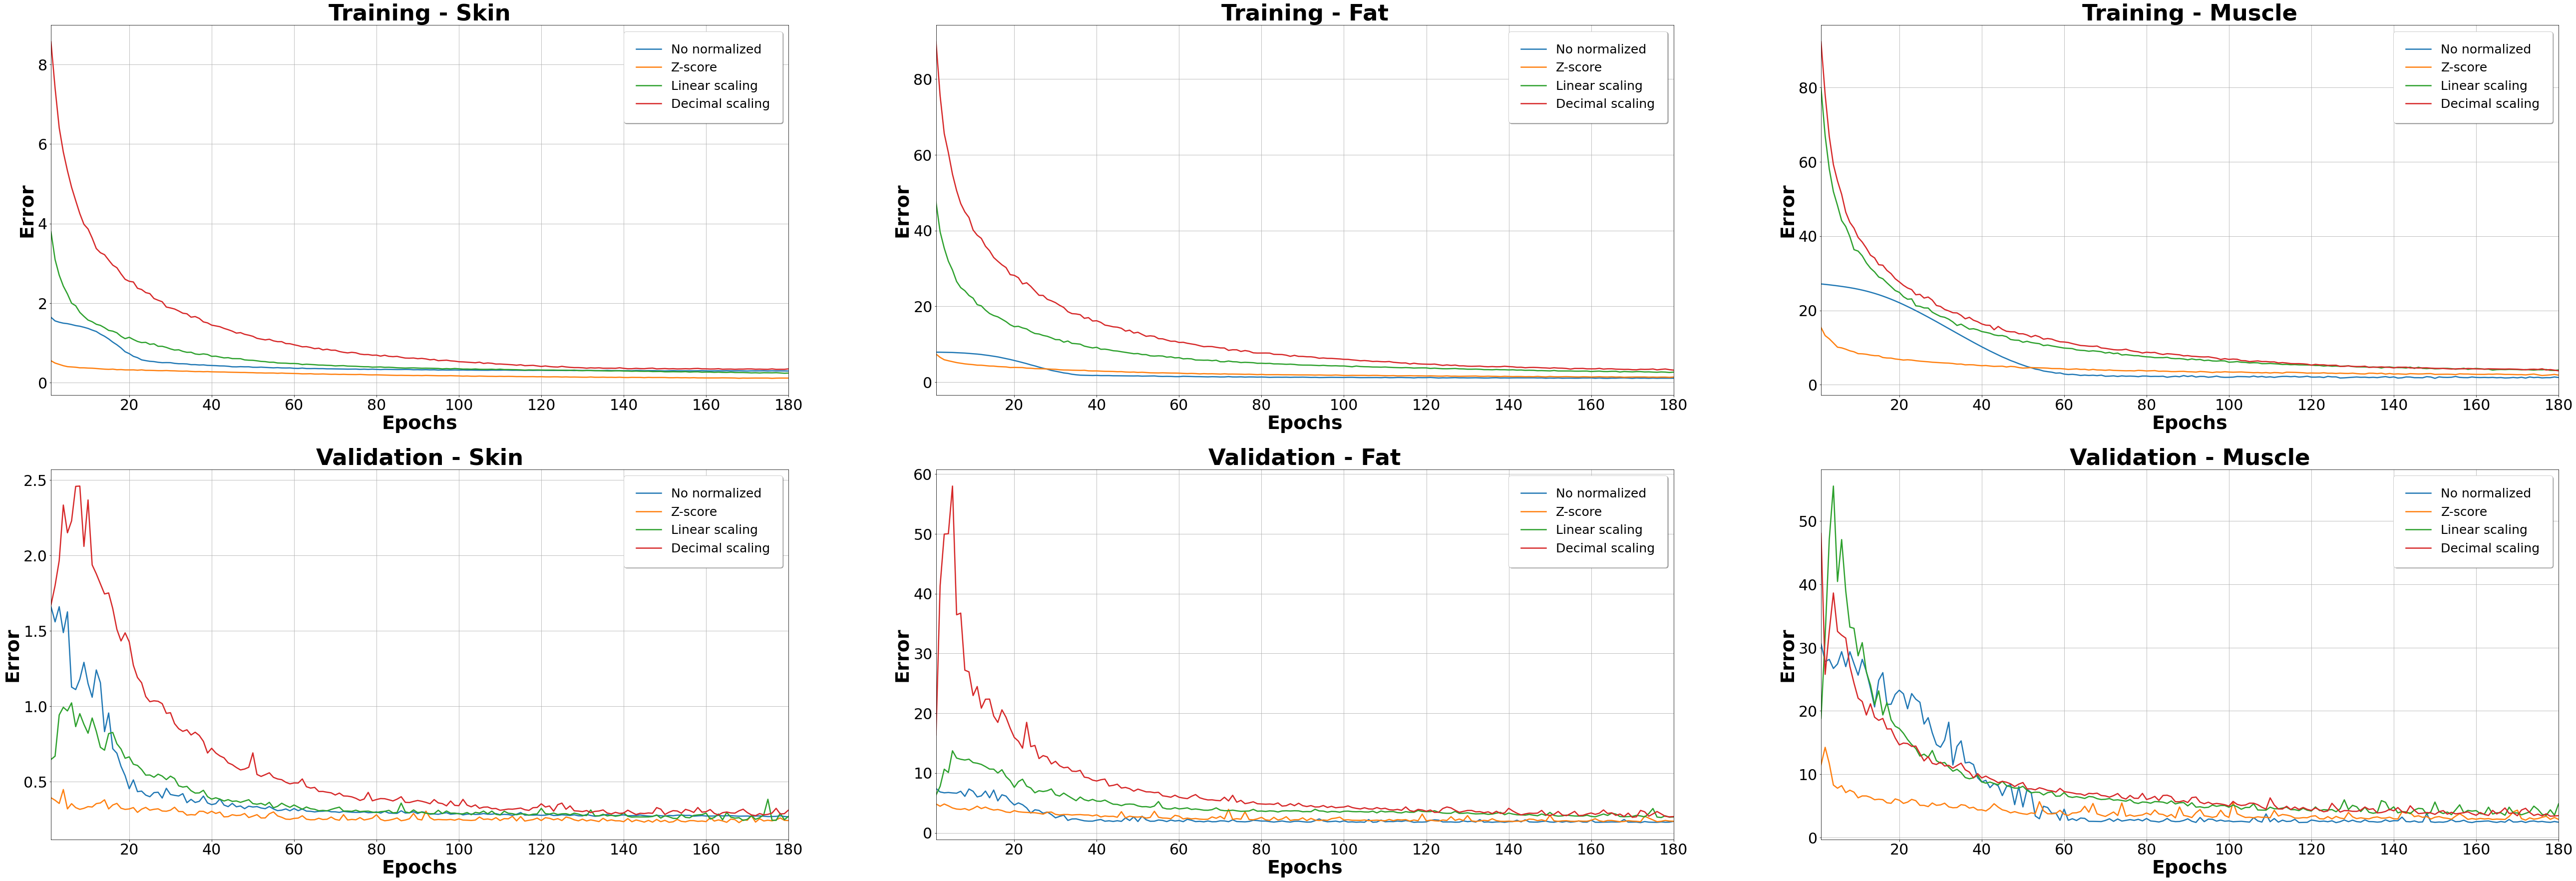

In [27]:
import matplotlib.pyplot as plt


tissues = y_info.keys()
histories = [history_snn_model1, history_snn_model2, history_snn_model3, history_snn_model4]
names = ['No normalized', 'Z-score', 'Linear scaling', 'Decimal scaling']

fig, axs = plt.subplots(2,3)
fig.set_figheight(30)
fig.set_figwidth(90)

epoch_array = [i for i in range(1,epoch+1)]

sufix = '_mae'
for history, name in list(zip(histories,names)):
    for row, prefix in enumerate(['','val_']):
        for col, tissue in enumerate(tissues):
            interest = prefix + tissue + sufix
            if name == 'Z-score':
                axs[row,col].plot(epoch_array,np.array(history.history[interest])*y_info[tissue].std(), label=name, linewidth=2.5)
            elif name == 'Linear scaling':
                axs[row,col].plot(epoch_array,np.array(history.history[interest])*(y_info[tissue].max()-y_info[tissue].min()), label=name, linewidth=2.5)
            elif name == 'Decimal scaling':
                if tissue == 'Skin':
                    k=10
                else:
                    k = 100
                axs[row,col].plot(epoch_array,np.array(history.history[interest])*k, label=name, linewidth=2.5)
            else:
                axs[row,col].plot(epoch_array,np.array(history.history[interest]), label=name, linewidth=2.5)
            axs[row,col].grid(True)
            axs[row,col].legend(fontsize=25, fancybox=True, framealpha=1, shadow=True, borderpad=1)
            if prefix == 'val_':
                title_name = 'Validation - ' + tissue
            else:
                title_name = 'Training - ' + tissue
            axs[row,col].set_title(title_name, fontsize=45, fontweight='bold')
            axs[row,col].set_xlabel('Epochs', fontsize=38, fontweight='black')
            axs[row,col].set_ylabel('Error', fontsize=38, fontweight='black')
            axs[row,col].tick_params(axis='x', labelsize=30) 
            axs[row,col].tick_params(axis='y', labelsize=30) 
            axs[row,col].set_xlim(1,epoch)
            
plt.savefig('normalization.png')

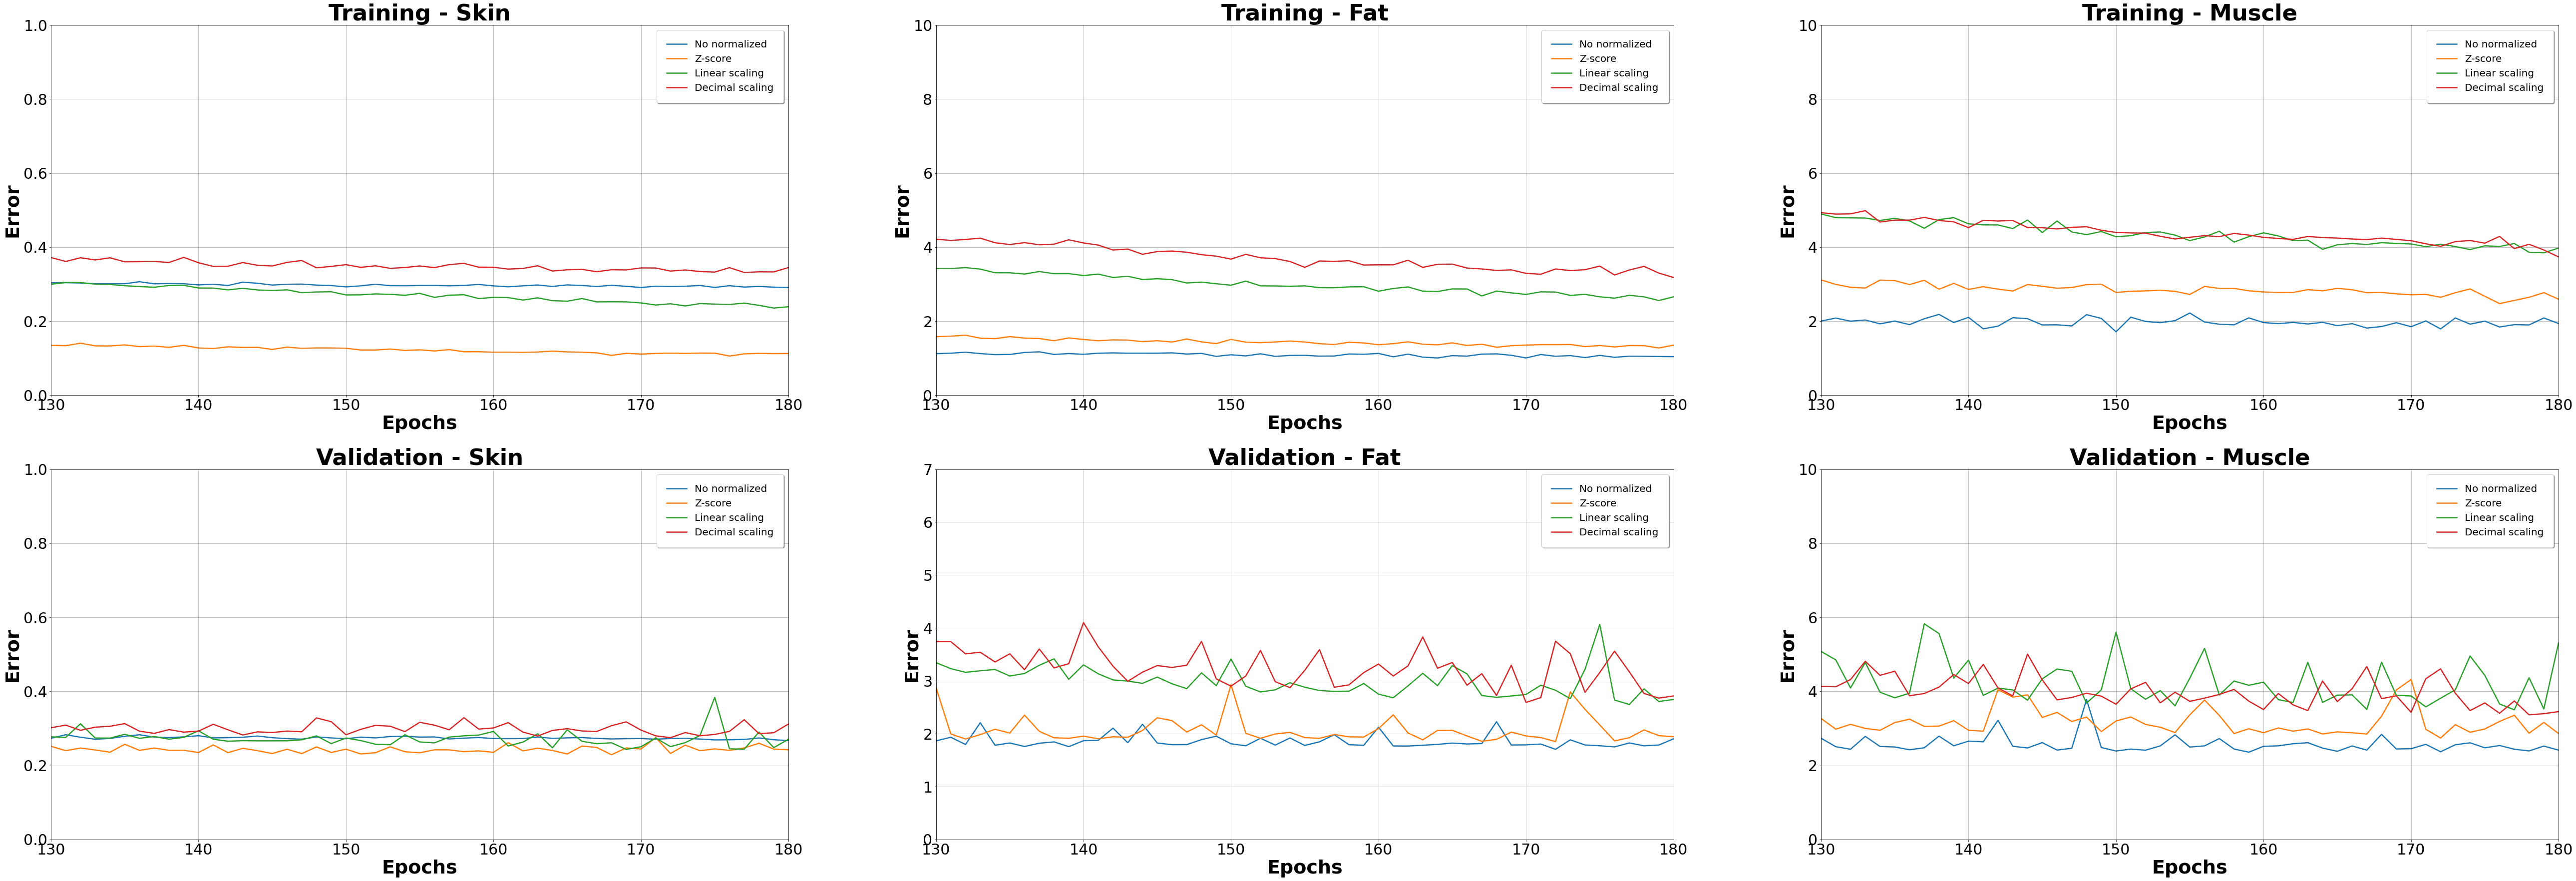

In [28]:
tissues = y_info.keys()
histories = [history_snn_model1, history_snn_model2, history_snn_model3, history_snn_model4]
names = ['No normalized', 'Z-score', 'Linear scaling', 'Decimal scaling']

fig, axs = plt.subplots(2,3)
fig.set_figheight(30)
fig.set_figwidth(90)

epoch_array = [i for i in range(1,epoch+1)]

sufix = '_mae'
for history, name in list(zip(histories,names)):
    for row, prefix in enumerate(['','val_']):
        for col, tissue in enumerate(tissues):
            interest = prefix + tissue + sufix
            if name == 'Z-score':
                axs[row,col].plot(epoch_array,np.array(history.history[interest])*y_info[tissue].std(), label=name, linewidth=2.5)
            elif name == 'Linear scaling':
                axs[row,col].plot(epoch_array,np.array(history.history[interest])*(y_info[tissue].max()-y_info[tissue].min()), label=name, linewidth=2.5)
            elif name == 'Decimal scaling':
                if tissue == 'Skin':
                    k=10
                else:
                    k = 100
                axs[row,col].plot(epoch_array,np.array(history.history[interest])*k, label=name, linewidth=2.5)
            else:
                axs[row,col].plot(epoch_array,np.array(history.history[interest]), label=name, linewidth=2.5)
            axs[row,col].grid(True)
            axs[row,col].legend(fontsize=20, fancybox=True, framealpha=1, shadow=True, borderpad=1)
            if prefix == 'val_':
                title_name = 'Validation - ' + tissue
            else:
                title_name = 'Training - ' + tissue
            axs[row,col].set_title(title_name, fontsize=45, fontweight='bold')
            axs[row,col].set_xlabel('Epochs', fontsize=38, fontweight='black')
            axs[row,col].set_ylabel('Error', fontsize=38, fontweight='black')
            axs[row,col].tick_params(axis='x', labelsize=30) 
            axs[row,col].tick_params(axis='y', labelsize=30) 
            axs[row,col].set_xlim(130,epoch)
axs[0,0].set_ylim(0,1)
axs[1,0].set_ylim(0,1)
axs[0,1].set_ylim(0,10)
axs[1,1].set_ylim(0,7)
axs[0,2].set_ylim(0,10)
axs[1,2].set_ylim(0,10)
plt.savefig('normalization_from130.png')